In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
import warnings
warnings.filterwarnings('ignore')

In [2]:
data_pass = pd.read_csv('password_dataset.csv',error_bad_lines=False)

In [3]:
data_pass.head()

,password,strength
0,kzde5577,1
1,kino3434,1
2,visi7k1yr,1
3,megzy123,1
4,lamborghin1,1


In [4]:
# function to replace string in the strength column

def replace_mail(x):
    try:
        int(x)
    except Exception:
        return np.nan
    else:
        return x
    
data_pass['strength']=data_pass['strength'].apply(lambda x:replace_mail(x))


In [5]:
data_pass['strength'].unique()

array(['1', '2', '0', nan], dtype=object)

In [6]:
# check missing values
data_pass.isna().sum()

password      1
strength    237
dtype: int64

In [7]:
# let drop nan
data_pass.dropna(inplace=True)

In [8]:
data_pass.isna().sum()

password    0
strength    0
dtype: int64

In [9]:
data_pass['strength'].unique()

array(['1', '2', '0'], dtype=object)

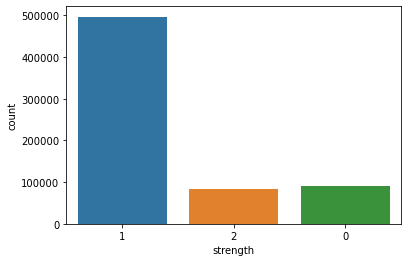

In [10]:
# countplot of the strength column
sns.countplot(data_pass['strength'])
plt.show()

The data is biased towards 1 and we can not use it for modeling

In [11]:
password_tupple = np.array(data_pass)

In [12]:
password_tupple

array([['kzde5577', '1'],
       ['kino3434', '1'],
       ['visi7k1yr', '1'],
       ...,
       ['184520socram', '1'],
       ['marken22a', '1'],
       ['fxx4pw4g', '1']], dtype=object)

In [13]:
import random
random.shuffle(password_tupple)

In [14]:
x=[label[0] for label in password_tupple]
y=[label[1] for label in password_tupple]

In [15]:
#passwords
x

['kzde5577',
 'kzde5577',
 'visi7k1yr',
 'kzde5577',
 'lamborghin1',
 'kino3434',
 'megzy123',
 'u6c8vhow',
 'AVYq1lDE4MgAZfNt',
 'megzy123',
 'universe2908',
 'u6c8vhow',
 'jytifok873',
 'asv5o9yu',
 'visi7k1yr',
 'as326159',
 'visi7k1yr',
 'idofo673',
 'idofo673',
 'megzy123',
 'as326159',
 'lamborghin1',
 'idofo673',
 'g067057895',
 'czuodhj972',
 'idofo673',
 'kino3434',
 'megzy123',
 'kzde5577',
 'kzde5577',
 'asgaliu11',
 'v1118714',
 'kzde5577',
 'trabajonet9',
 'AVYq1lDE4MgAZfNt',
 'as326159',
 'fk9qi21m',
 'lamborghin1',
 'lsdlsd1',
 'AVYq1lDE4MgAZfNt',
 'memjan123',
 'AVYq1lDE4MgAZfNt',
 'trabajonet9',
 'gaymaids1',
 'czuodhj972',
 '612035180tok',
 'olmaz.',
 'klara-tershina3H',
 'yitbos77',
 'WUt9IZzE0OQ7PkNE',
 '6975038lp',
 'universe2908',
 '6975038lp',
 'asgaliu11',
 'v1118714',
 'yk530mg8',
 'alimagik1',
 'a2531106',
 'gaymaids1',
 'lsdlsd1',
 'olmaz.',
 'hpqkoxsn5',
 'megzy123',
 'matiofox08',
 'ok>bdk',
 '6975038lp',
 'kzde5577',
 'idofo673',
 'kjkjkj1',
 'AVYq1lDE4MgA

In [16]:
# function to split the password into characters

def word_to_character(inputs):
    character =[]
    for i in inputs:
        character.append(i)
    return character

In [17]:
word_to_character('kino3434')

['k', 'i', 'n', 'o', '3', '4', '3', '4']

In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [19]:
vectorizer = TfidfVectorizer(tokenizer=word_to_character)

In [20]:
X = vectorizer.fit_transform(x)

In [21]:
X.shape

(669639, 131)

In [22]:
# to get the data of X
first_doc = X[0]

In [23]:
first_doc.T.todense()

matrix([[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.56715785],
        [0.        ],
        [0.59183218],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0

In [24]:
df = pd.DataFrame(first_doc.T.todense(), index=vectorizer.get_feature_names_out(), columns=['TF-IDF'])

In [25]:
df.sort_values(by='TF-IDF', ascending=False)

,TF-IDF
7,0.591832
5,0.567158
z,0.335573
k,0.291600
d,0.285512
...,...
=,0.000000
<,0.000000
;,0.000000
9,0.000000


In [26]:
# Train test split the data
from sklearn.model_selection import train_test_split

In [27]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [28]:
from sklearn.metrics import classification_report, confusion_matrix
# model predictions functions
def prediction(model):
    model_name = model
    model_name.fit(x_train,y_train)
    y_pred = model_name.predict(x_test)
    
    model_score = model_name.score(x_test,y_test)
    
    cross_tab = pd.crosstab(y_test,y_pred)
    clf = classification_report(y_test,y_pred)
    
    print('model_name: {}'.format(model_name))
    print('model score: {}'.format(model_score))
    print('----------------------------------------------------\n')
    print(cross_tab)
    print('******************************************************\n')
    print(clf)
    print('++++++++++++++++++++++++++++++++++++++++++++++++=++++++\n')
    

In [29]:
# Algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC


In [30]:
# LogisticRegression
prediction(LogisticRegression())

model_name: LogisticRegression()
model score: 0.8170733528463054
----------------------------------------------------

col_0     0      1      2
row_0                    
0      5293  12739      8
1      3927  92777   2591
2        43   5191  11359
******************************************************

              precision    recall  f1-score   support

           0       0.57      0.29      0.39     18040
           1       0.84      0.93      0.88     99295
           2       0.81      0.68      0.74     16593

    accuracy                           0.82    133928
   macro avg       0.74      0.64      0.67    133928
weighted avg       0.80      0.82      0.80    133928

++++++++++++++++++++++++++++++++++++++++++++++++=++++++



In [35]:
# Decision Tree
prediction(DecisionTreeClassifier())

model_name: DecisionTreeClassifier()
model score: 0.9723209485693806
----------------------------------------------------

col_0      0      1      2
row_0                     
0      16931   1054     55
1       1001  97541    753
2        124    720  15749
******************************************************

              precision    recall  f1-score   support

           0       0.94      0.94      0.94     18040
           1       0.98      0.98      0.98     99295
           2       0.95      0.95      0.95     16593

    accuracy                           0.97    133928
   macro avg       0.96      0.96      0.96    133928
weighted avg       0.97      0.97      0.97    133928

++++++++++++++++++++++++++++++++++++++++++++++++=++++++



In [ ]:
# SVC
prediction(SVC())

In [ ]:
# DecisionTreeClassifier
#prediction(DecisionTreeClassifier())